In [3]:
#Step 1: Load and Inspect the Data
import pandas as pd

# Load the training dataset
df = pd.read_csv("train.csv")

# Display the first few rows
print(df.head())

# Show data types and non-null counts
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check class distribution of the target variable
print(df['Fertilizer Name'].value_counts())


   id  Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
0   0           37        70        36    Clayey  Sugarcane        36   
1   1           27        69        65     Sandy    Millets        30   
2   2           29        63        32     Sandy    Millets        24   
3   3           35        62        54     Sandy     Barley        39   
4   4           35        58        43       Red      Paddy        37   

   Potassium  Phosphorous Fertilizer Name  
0          4            5           28-28  
1          6           18           28-28  
2         12           16        17-17-17  
3         12            4        10-26-26  
4          2           16             DAP  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2

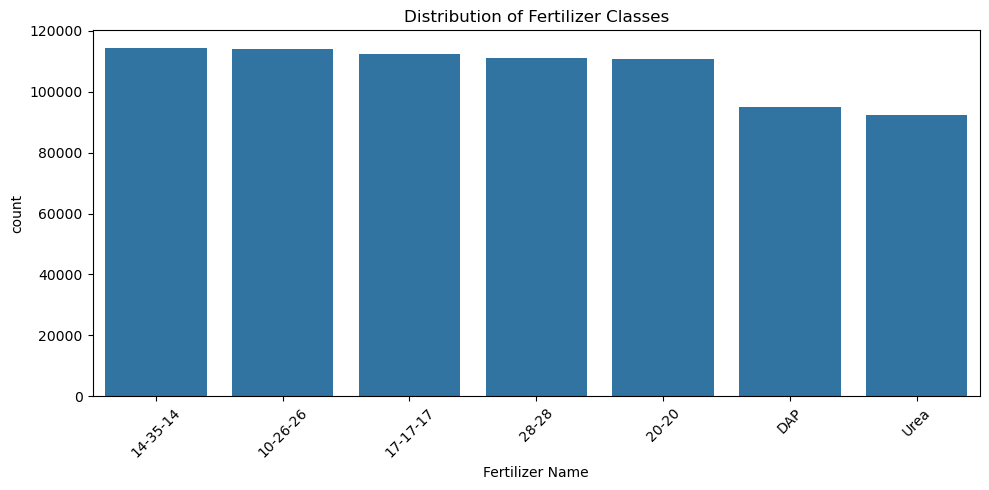

In [4]:
# Visualize the Target Class Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 5))

# Create a countplot for the target variable
sns.countplot(data=df, x='Fertilizer Name', order=df['Fertilizer Name'].value_counts().index)

# Set plot title and rotate x labels for readability
plt.title("Distribution of Fertilizer Classes")
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


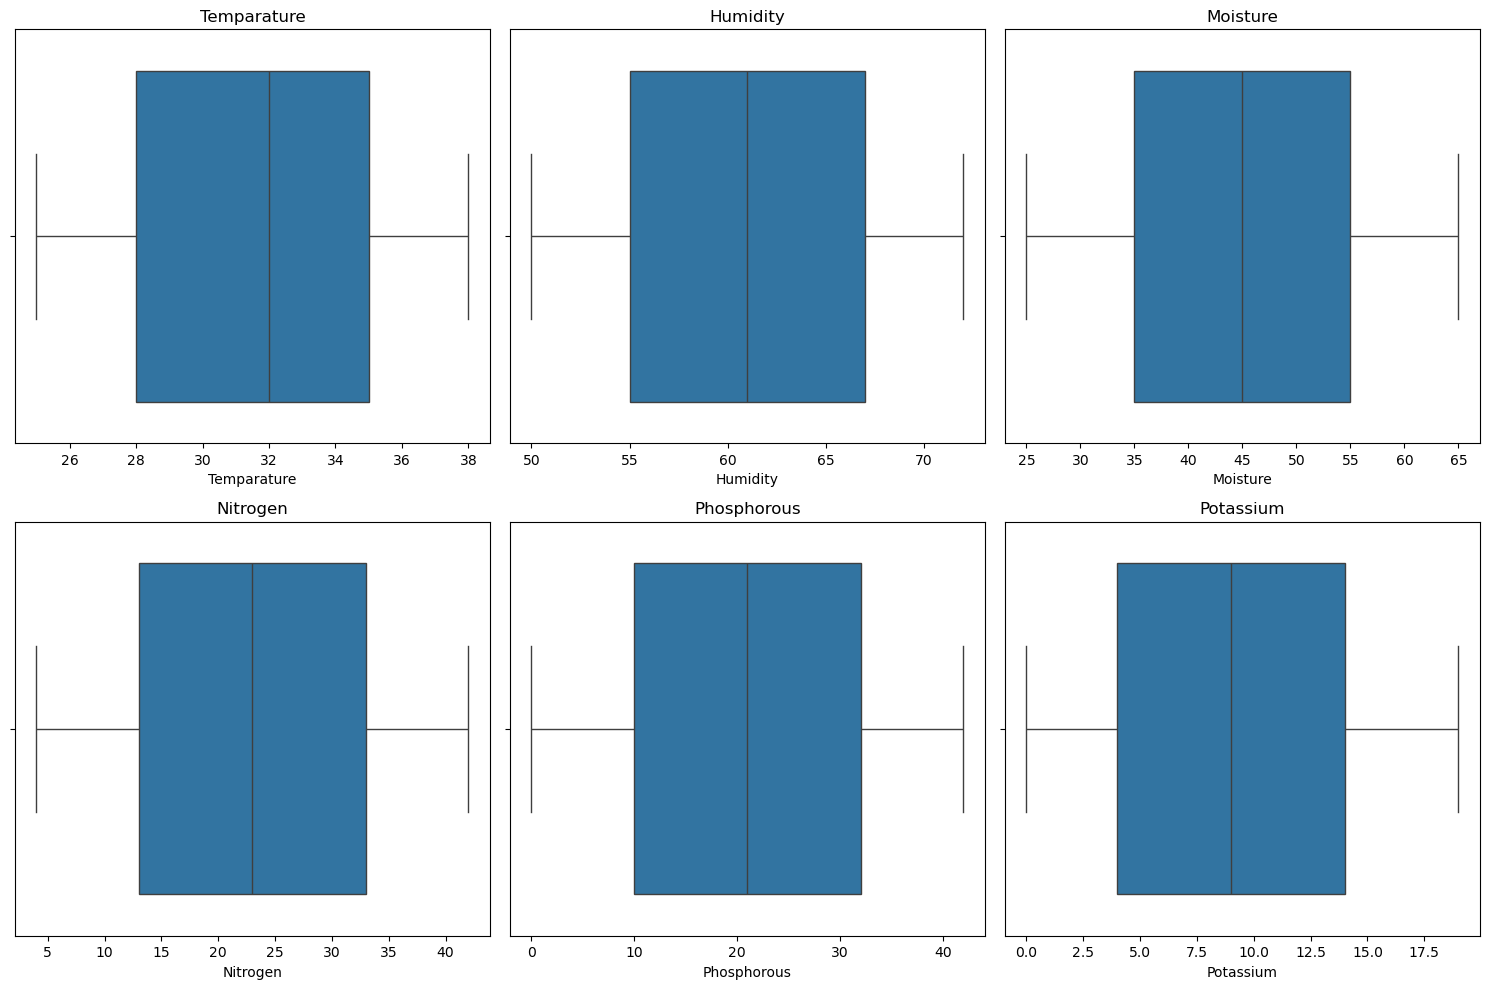

In [5]:
#Visualize Numeric Feature Distributions with Boxplots
# Define numeric columns to visualize
numeric_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Phosphorous', 'Potassium']

# Create subplots for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns layout
    sns.boxplot(data=df, x=col)
    plt.title(col)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [6]:
#Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Create encoders
soil_encoder = LabelEncoder()
crop_encoder = LabelEncoder()
fertilizer_encoder = LabelEncoder()  # also encode target

# Apply encoders
df['Soil Type'] = soil_encoder.fit_transform(df['Soil Type'])
df['Crop Type'] = crop_encoder.fit_transform(df['Crop Type'])
df['Fertilizer Name'] = fertilizer_encoder.fit_transform(df['Fertilizer Name'])

# Preview encoded data
print(df.head())


   id  Temparature  Humidity  Moisture  Soil Type  Crop Type  Nitrogen  \
0   0           37        70        36          1          8        36   
1   1           27        69        65          4          4        30   
2   2           29        63        32          4          4        24   
3   3           35        62        54          4          0        39   
4   4           35        58        43          3          6        37   

   Potassium  Phosphorous  Fertilizer Name  
0          4            5                4  
1          6           18                4  
2         12           16                2  
3         12            4                0  
4          2           16                5  


In [7]:
#Top 3 selected features
from sklearn.feature_selection import SelectKBest, f_classif

# Define features and target
X = df.drop(columns=['id', 'Fertilizer Name'])
y = df['Fertilizer Name']

# Apply SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=3)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top 3 selected features:", selected_features.tolist())


Top 3 selected features: ['Moisture', 'Soil Type', 'Crop Type']


In [ ]:
#Train SVM and Visualize in 3D
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Keep only the selected features
X_selected = df[selected_features]
y = df['Fertilizer Name']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Scale features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

# Check accuracy on test set
print("Test Accuracy:", svm_model.score(X_test_scaled, y_test))


In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Define the full set of relevant features
features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen',
            'Phosphorous', 'Potassium', 'Soil Type', 'Crop Type']

# Encode categorical features
df_encoded = df.copy()
df_encoded['Soil Type'] = LabelEncoder().fit_transform(df_encoded['Soil Type'])
df_encoded['Crop Type'] = LabelEncoder().fit_transform(df_encoded['Crop Type'])

# Features and target
X = df_encoded[features]
y = df_encoded['Fertilizer Name']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RBF kernel approximation + fast linear classifier
rbf_feature = RBFSampler(gamma=1, random_state=42, n_components=500)
svm_fast = make_pipeline(rbf_feature, SGDClassifier(max_iter=1000, tol=1e-3))

# Train
svm_fast.fit(X_train_scaled, y_train)

# Evaluate
print("Test Accuracy with more features:", svm_fast.score(X_test_scaled, y_test))

Test Accuracy with more features: 0.15198


In [11]:
# Use only a small sample of the data
small_df = df.sample(n=5000, random_state=42)

# Prepare inputs
X_selected_small = small_df[selected_features]
y_small = small_df['Fertilizer Name']

# Split, scale, and train
X_train, X_test, y_train, y_test = train_test_split(X_selected_small, y_small, test_size=0.2, random_state=42, stratify=y_small)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

print("Test Accuracy (on 5000 samples):", svm_model.score(X_test_scaled, y_test))


Test Accuracy (on 5000 samples): 0.158


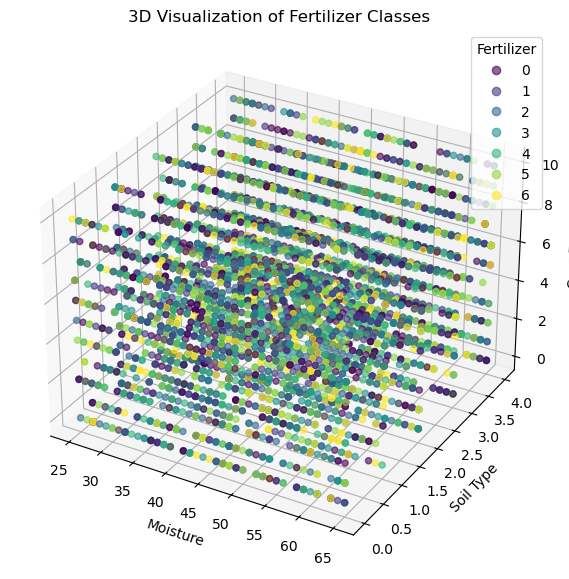

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Use a small subset again for easier visualization
plot_df = small_df.copy()

# Encode labels to numeric (for color mapping)
from sklearn.preprocessing import LabelEncoder
encoded_labels = LabelEncoder().fit_transform(plot_df['Fertilizer Name'])

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    plot_df['Moisture'],
    plot_df['Soil Type'],
    plot_df['Crop Type'],
    c=encoded_labels,
    cmap='viridis',
    s=20,
    alpha=0.6
)

ax.set_xlabel("Moisture")
ax.set_ylabel("Soil Type")
ax.set_zlabel("Crop Type")
plt.title("3D Visualization of Fertilizer Classes")

# Create legend
legend_labels = LabelEncoder().fit(plot_df['Fertilizer Name']).classes_
legend = ax.legend(*scatter.legend_elements(), title="Fertilizer", loc="upper right")
for t, label in zip(legend.get_texts(), legend_labels):
    t.set_text(label)
plt.show()


In [13]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Encode categorical columns
df_xgb = df.copy()
df_xgb['Soil Type'] = LabelEncoder().fit_transform(df_xgb['Soil Type'])
df_xgb['Crop Type'] = LabelEncoder().fit_transform(df_xgb['Crop Type'])
df_xgb['Fertilizer Name'] = LabelEncoder().fit_transform(df_xgb['Fertilizer Name'])

# Define features and target
features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Phosphorous', 'Potassium', 'Soil Type', 'Crop Type']
X = df_xgb[features]
y = df_xgb['Fertilizer Name']

# Sample a smaller dataset to speed up training (optional)
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=50000, stratify=y, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample)

# Train the model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=7, eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Test Accuracy:", accuracy)


C:\Users\siman_gand23m\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:11:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Test Accuracy: 0.1709


In [23]:
df_raw = pd.read_csv("train.csv")

# پاکسازی فاصله‌ها
df_raw['Fertilizer Name'] = df_raw['Fertilizer Name'].str.strip()

# بررسی کلاس‌ها
print(df_raw['Fertilizer Name'].unique())

df_binary = df_raw[df_raw['Fertilizer Name'].isin(['Urea', 'DAP'])].copy()

# بررسی اینکه واقعاً رکورد داریم
print(df_binary.shape)
print(df_binary['Fertilizer Name'].value_counts())


['28-28' '17-17-17' '10-26-26' 'DAP' '20-20' '14-35-14' 'Urea']
(187177, 10)
Fertilizer Name
DAP     94860
Urea    92317
Name: count, dtype: int64


In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode target label
df_binary['Fertilizer Name'] = LabelEncoder().fit_transform(df_binary['Fertilizer Name'])


In [25]:
# Encode Soil Type and Crop Type
df_encoded = pd.get_dummies(df_binary, columns=['Soil Type', 'Crop Type'])


In [26]:
# Features and target
X = df_encoded.drop(columns=['id', 'Fertilizer Name'])
y = df_encoded['Fertilizer Name']


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Train XGBoost binary classifier
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Binary Classification Accuracy (DAP vs Urea):", accuracy)


C:\Users\siman_gand23m\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:23:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Binary Classification Accuracy (DAP vs Urea): 0.5673415963243936


In [29]:
df_encoded['N_to_P'] = df_encoded['Nitrogen'] / (df_encoded['Phosphorous'] + 1)
df_encoded['P_to_K'] = df_encoded['Phosphorous'] / (df_encoded['Potassium'] + 1)
df_encoded['Moisture_Humidity'] = df_encoded['Moisture'] / (df_encoded['Humidity'] + 1)


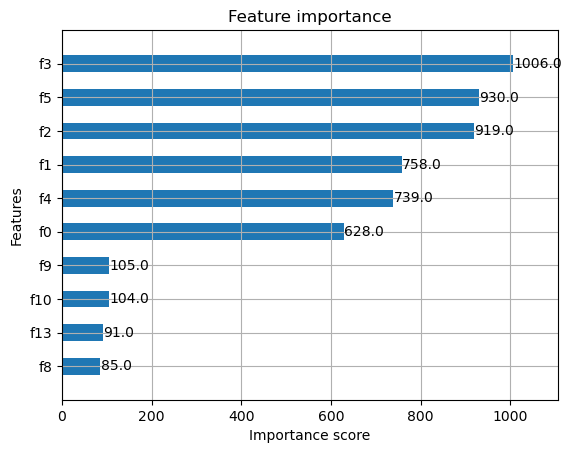

In [30]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, max_num_features=10, height=0.5)
plt.show()


In [31]:
# Print the mapping of feature index to column name
for i, col in enumerate(X.columns):
    print(f"f{i} = {col}")


f0 = Temparature
f1 = Humidity
f2 = Moisture
f3 = Nitrogen
f4 = Potassium
f5 = Phosphorous
f6 = Soil Type_Black
f7 = Soil Type_Clayey
f8 = Soil Type_Loamy
f9 = Soil Type_Red
f10 = Soil Type_Sandy
f11 = Crop Type_Barley
f12 = Crop Type_Cotton
f13 = Crop Type_Ground Nuts
f14 = Crop Type_Maize
f15 = Crop Type_Millets
f16 = Crop Type_Oil seeds
f17 = Crop Type_Paddy
f18 = Crop Type_Pulses
f19 = Crop Type_Sugarcane
f20 = Crop Type_Tobacco
f21 = Crop Type_Wheat


In [32]:
df_encoded['N_to_P'] = df_encoded['Nitrogen'] / (df_encoded['Phosphorous'] + 1)
df_encoded['P_to_K'] = df_encoded['Phosphorous'] / (df_encoded['Potassium'] + 1)
df_encoded['Moisture_Humidity'] = df_encoded['Moisture'] / (df_encoded['Humidity'] + 1)


In [33]:
# Create features and labels again
X = df_encoded.drop(columns=['id', 'Fertilizer Name'])
y = df_encoded['Fertilizer Name']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
model.fit(X_train_scaled, y_train)

# Predict & evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Engineered Features:", accuracy)



C:\Users\siman_gand23m\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:28:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy with Engineered Features: 0.5636285927983758


In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

# Step 1: Create feature matrix X and label vector y
# (فرض بر اینه که df_encoded و y همون df_binary با one-hot هستن)
X = df_encoded.drop(columns=['id', 'Fertilizer Name'])
y = df_encoded['Fertilizer Name']

# Step 2: Apply SelectKBest to keep top k features based on ANOVA F-score
# ANOVA مناسب برای classification است
k = 10  # تعداد فیچرهایی که می‌خوایم نگه داریم
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Step 3: Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())


Selected Features: ['Nitrogen', 'Potassium', 'Soil Type_Black', 'Soil Type_Red', 'Crop Type_Barley', 'Crop Type_Millets', 'Crop Type_Paddy', 'Crop Type_Sugarcane', 'Crop Type_Tobacco', 'P_to_K']


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Step 1: فیلتر کردن دیتافریم بر اساس فیچرهای منتخب
X = df_encoded[selected_features]
y = df_encoded['Fertilizer Name']

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Scale (فقط روی عددی‌ها تاثیر داره، ولی لازمه برای XGBoost دقیق‌تر)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: مدل XGBoost
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
model.fit(X_train_scaled, y_train)

# Step 5: پیش‌بینی و ارزیابی دقت
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Selected Features:", accuracy)


C:\Users\siman_gand23m\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:34:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy with Selected Features: 0.5458382305801902


In [36]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Define feature set (top 10 features from SelectKBest)
X = df_encoded[selected_features]
y = df_encoded['Fertilizer Name']  # binary target: 0 = DAP, 1 = Urea

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize individual models
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
log_clf = LogisticRegression(max_iter=1000, random_state=42)

# Step 5: Combine models into a VotingClassifier (hard voting by default)
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('rf', rf_clf),
        ('lr', log_clf)
    ],
    voting='hard'  # change to 'soft' for probability-based averaging
)

# Step 6: Train the ensemble model
voting_clf.fit(X_train_scaled, y_train)

# Step 7: Predict and evaluate accuracy
y_pred = voting_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble VotingClassifier Accuracy:", accuracy)


C:\Users\siman_gand23m\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:36:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Ensemble VotingClassifier Accuracy: 0.5374505823271717


In [37]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize individual models again
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
log_clf = LogisticRegression(max_iter=1000, random_state=42)

# Create VotingClassifier with soft voting (uses predicted probabilities)
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_clf),
        ('rf', rf_clf),
        ('lr', log_clf)
    ],
    voting='soft'  # soft = probability averaging
)

# Train the ensemble model
voting_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Soft VotingClassifier Accuracy:", accuracy)


C:\Users\siman_gand23m\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:01:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Soft VotingClassifier Accuracy: 0.5268992413719414


In [38]:
import pandas as pd

# Load the original full dataset
df_full = pd.read_csv("train.csv")

# Clean whitespace from Fertilizer Name
df_full['Fertilizer Name'] = df_full['Fertilizer Name'].str.strip()

# Print unique classes to confirm
print("Classes:", df_full['Fertilizer Name'].unique())


Classes: ['28-28' '17-17-17' '10-26-26' 'DAP' '20-20' '14-35-14' 'Urea']


In [39]:
from sklearn.preprocessing import LabelEncoder

# Encode target classes
label_encoder = LabelEncoder()
df_full['Fertilizer Name'] = label_encoder.fit_transform(df_full['Fertilizer Name'])

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_full, columns=['Soil Type', 'Crop Type'])

# Check shape
print("Data shape after encoding:", df_encoded.shape)


Data shape after encoding: (750000, 24)


In [40]:
# Add engineered features
df_encoded['N_to_P'] = df_encoded['Nitrogen'] / (df_encoded['Phosphorous'] + 1)
df_encoded['P_to_K'] = df_encoded['Phosphorous'] / (df_encoded['Potassium'] + 1)
df_encoded['Moisture_Humidity'] = df_encoded['Moisture'] / (df_encoded['Humidity'] + 1)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Features and target
X = df_encoded.drop(columns=['id', 'Fertilizer Name'])
y = df_encoded['Fertilizer Name']  # Now multiclass: 7 classes

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost for multi-class
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=7,
    eval_metric='mlogloss',
    use_label_encoder=False
)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Multi-class Accuracy:", accuracy)


C:\Users\siman_gand23m\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:07:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Multi-class Accuracy: 0.19055333333333332


In [42]:
import numpy as np
unique, counts = np.unique(y, return_counts=True)
for label, count in zip(label_encoder.inverse_transform(unique), counts):
    print(f"{label}: {count}")


10-26-26: 113887
14-35-14: 114436
17-17-17: 112453
20-20: 110889
28-28: 111158
DAP: 94860
Urea: 92317


In [43]:
# Reload raw dataset
df_raw = pd.read_csv("train.csv")
df_raw['Fertilizer Name'] = df_raw['Fertilizer Name'].str.strip()

# Filter 4 target classes
target_classes = ['DAP', 'Urea', '10-26-26', '17-17-17']
df_four = df_raw[df_raw['Fertilizer Name'].isin(target_classes)].copy()

# Encode target labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_four['Fertilizer Name'] = label_encoder.fit_transform(df_four['Fertilizer Name'])

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_four, columns=['Soil Type', 'Crop Type'])

# Feature engineering
df_encoded['N_to_P'] = df_encoded['Nitrogen'] / (df_encoded['Phosphorous'] + 1)
df_encoded['P_to_K'] = df_encoded['Phosphorous'] / (df_encoded['Potassium'] + 1)
df_encoded['Moisture_Humidity'] = df_encoded['Moisture'] / (df_encoded['Humidity'] + 1)

# Prepare features and labels
X = df_encoded.drop(columns=['id', 'Fertilizer Name'])
y = df_encoded['Fertilizer Name']


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize and train XGBoost model for 4-class classification
model = xgb.XGBClassifier(
    objective='multi:softmax',  # multi-class classification
    num_class=4,                # we have 4 fertilizer classes
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train_scaled, y_train)

# Step 4: Predict and evaluate accuracy
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Multi-class Accuracy (4 fertilizers):", accuracy)


C:\Users\siman_gand23m\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:22:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Multi-class Accuracy (4 fertilizers): 0.3222093248210486


In [45]:
pip install shap


   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 2.6 MB/s eta 0:00:00


In [46]:
import shap

# Create a TreeExplainer for XGBoost
explainer = shap.Explainer(model)

# Compute SHAP values for test set
shap_values = explainer(X_test_scaled)


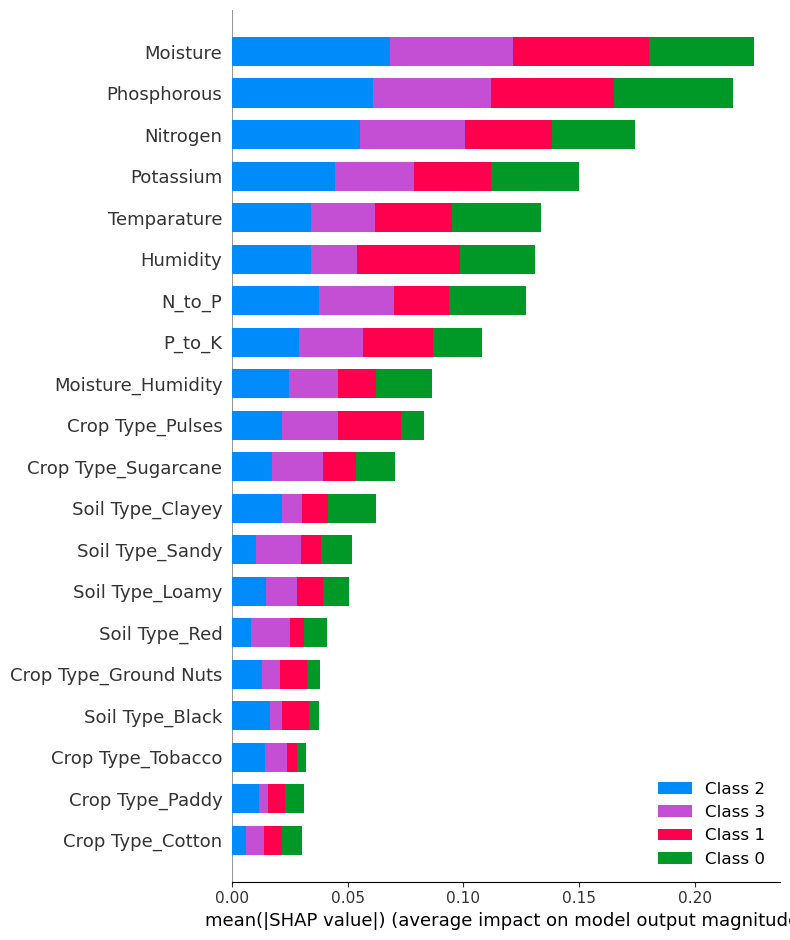

In [47]:
# SHAP summary plot for top feature impacts
shap.summary_plot(shap_values, features=X_test_scaled, feature_names=X.columns)


In [50]:
# Pick a misclassified example
import numpy as np
misclassified_idx = np.where(y_pred != y_test.values)[0][0]

# Pick the predicted class index
class_idx = y_pred[misclassified_idx]  # SHAP expects index of predicted class

# Extract SHAP values and base value for the predicted class
instance_shap_values = shap_values.values[misclassified_idx, :, class_idx]
base_value = shap_values.base_values[misclassified_idx, class_idx]

# Extract feature values
instance_data = X_test_scaled[misclassified_idx]

# Show force plot
shap.initjs()
shap.force_plot(base_value, instance_shap_values, instance_data, feature_names=X.columns)



In [1]:
import pandas as pd

# Load the test dataset
test_df = pd.read_csv("test.csv")

# Optional: preview
print(test_df.head())


       id  Temparature  Humidity  Moisture Soil Type    Crop Type  Nitrogen  \
0  750000           31        70        52     Sandy        Wheat        34   
1  750001           27        62        45       Red    Sugarcane        30   
2  750002           28        72        28    Clayey  Ground Nuts        14   
3  750003           37        53        57     Black  Ground Nuts        18   
4  750004           31        55        32       Red       Pulses        13   

   Potassium  Phosphorous  
0         11           24  
1         14           15  
2         15            4  
3         17           36  
4         19           14  


In [2]:
# One-hot encode categorical columns
test_encoded = pd.get_dummies(test_df, columns=["Soil Type", "Crop Type"])

# Create engineered features
test_encoded['N_to_P'] = test_encoded['Nitrogen'] / (test_encoded['Phosphorous'] + 1)
test_encoded['P_to_K'] = test_encoded['Phosphorous'] / (test_encoded['Potassium'] + 1)
test_encoded['Moisture_Humidity'] = test_encoded['Moisture'] / (test_encoded['Humidity'] + 1)


In [7]:
from sklearn.preprocessing import LabelEncoder

# Create and fit the encoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_encoded["Fertilizer Name"])


In [8]:
# Load train
train_df = pd.read_csv("train.csv")

# Encode categorical
train_encoded = pd.get_dummies(train_df, columns=["Soil Type", "Crop Type"])

# Feature engineering
train_encoded['N_to_P'] = train_encoded['Nitrogen'] / (train_encoded['Phosphorous'] + 1)
train_encoded['P_to_K'] = train_encoded['Phosphorous'] / (train_encoded['Potassium'] + 1)
train_encoded['Moisture_Humidity'] = train_encoded['Moisture'] / (train_encoded['Humidity'] + 1)

# Split features and target
X = train_encoded.drop(columns=["Fertilizer Name", "id"])
y = label_encoder.fit_transform(train_encoded["Fertilizer Name"])



In [9]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (اختیاری)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)


C:\Users\siman_gand23m\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:50:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [10]:
# Encode categoricals
test_encoded = pd.get_dummies(test_df, columns=["Soil Type", "Crop Type"])

# Feature engineering
test_encoded['N_to_P'] = test_encoded['Nitrogen'] / (test_encoded['Phosphorous'] + 1)
test_encoded['P_to_K'] = test_encoded['Phosphorous'] / (test_encoded['Potassium'] + 1)
test_encoded['Moisture_Humidity'] = test_encoded['Moisture'] / (test_encoded['Humidity'] + 1)


In [11]:
# Align with X columns
missing_cols = set(X.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0

# Reorder columns
test_encoded = test_encoded[X.columns]


In [12]:
X_test_scaled = scaler.transform(test_encoded)
y_test_pred = model.predict(X_test_scaled)
y_pred_labels = label_encoder.inverse_transform(y_test_pred)


In [13]:
submission = pd.DataFrame({
    "id": test_df["id"],
    "Fertilizer Name": y_pred_labels
})

submission.to_csv("submission.csv", index=False)
